In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# scaler and encoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

from sklearn.metrics import r2_score as r2, mean_squared_error as mse
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_predict, cross_validate

from datetime import datetime


from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor ,VotingRegressor


plt.style.use('seaborn')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


import pycaret
from pycaret.classification import *
from pycaret.utils import version
version()

'2.3.6'

In [2]:
train = pd.read_csv('train.csv')
test =  pd.read_csv('test.csv')
sub =   pd.read_csv('sample_submission.csv')

In [22]:
sub =   pd.read_csv('sample_submission.csv')

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
sub.head()

In [ ]:
train.info()

In [ ]:
test.info()

In [ ]:
train.columns

In [ ]:
train.dtypes

In [ ]:
train.isnull().sum()

In [ ]:
# demo = setup(data = train_df, target = 'engagement_score', 
#                    normalize = False,
#                    transformation= False, transformation_method = 'yeo-johnson', 
#                    transform_target = True, remove_outliers= True,
#                    remove_multicollinearity = True,
#                    ignore_low_variance = True, combine_rare_levels = True) 

In [11]:
from pycaret.classification import *
exp_reg101 = setup(data = train,
                   target = 'target',
                   ignore_features =['row_id'],
                   fold = 2,
                   session_id=123)

,Description,Value
0,session_id,123
1,Target,target
2,Target Type,Multiclass
3,Label Encoded,"Bacteroides_fragilis: 0, Campylobacter_jejuni: 1, Enterococcus_hirae: 2, Escherichia_coli: 3, Escherichia_fergusonii: 4, Klebsiella_pneumoniae: 5, Salmonella_enterica: 6, Staphylococcus_aureus: 7, Streptococcus_pneumoniae: 8, Streptococcus_pyogenes: 9"
4,Original Data,"(200000, 288)"
5,Missing Values,0
6,Numeric Features,286
7,Categorical Features,0
8,Ordinal Features,0
9,High Cardinality Features,0


In [12]:
best = compare_models(sort = 'Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9760,0.9995,0.9760,0.9760,0.9760,0.9733,0.9733,12.6400
rf,Random Forest Classifier,0.9757,0.9994,0.9757,0.9757,0.9756,0.9730,0.9730,10.9200
xgboost,Extreme Gradient Boosting,0.9714,0.9995,0.9714,0.9714,0.9714,0.9682,0.9682,250.3600
lightgbm,Light Gradient Boosting Machine,0.9692,0.9994,0.9692,0.9692,0.9692,0.9657,0.9657,62.2150
knn,K Neighbors Classifier,0.9295,0.9903,0.9295,0.9298,0.9295,0.9217,0.9217,423.0600
dt,Decision Tree Classifier,0.9231,0.9573,0.9232,0.9232,0.9232,0.9146,0.9146,7.2150
gbc,Gradient Boosting Classifier,0.8866,0.9930,0.8867,0.8870,0.8867,0.8740,0.8740,947.8100
lda,Linear Discriminant Analysis,0.7427,0.9614,0.7425,0.7709,0.7480,0.7141,0.7163,5.3950
qda,Quadratic Discriminant Analysis,0.6596,0.9374,0.6597,0.7335,0.6437,0.6218,0.6349,8.7050
ridge,Ridge Classifier,0.6590,0.0000,0.6595,0.6810,0.6437,0.6212,0.6275,1.5200


In [13]:
rf = create_model('rf', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9865,0.9998,0.9865,0.9865,0.9865,0.9850,0.9850
1,0.9882,0.9998,0.9883,0.9883,0.9883,0.9869,0.9869
2,0.9866,0.9998,0.9866,0.9866,0.9866,0.9851,0.9851
3,0.9874,0.9998,0.9874,0.9874,0.9874,0.9860,0.9860
4,0.9890,0.9998,0.9890,0.9890,0.9890,0.9877,0.9877
Mean,0.9875,0.9998,0.9875,0.9875,0.9875,0.9862,0.9862
SD,0.0010,0.0000,0.0009,0.0010,0.0010,0.0011,0.0011


In [14]:
et = create_model('et', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9858,0.9998,0.9858,0.9858,0.9857,0.9842,0.9842
1,0.9889,0.9999,0.9889,0.9889,0.9889,0.9877,0.9877
2,0.9871,0.9998,0.9871,0.9871,0.9871,0.9856,0.9856
3,0.9888,0.9999,0.9888,0.9887,0.9887,0.9875,0.9875
4,0.9881,0.9999,0.9882,0.9882,0.9881,0.9868,0.9868
Mean,0.9877,0.9999,0.9877,0.9877,0.9877,0.9864,0.9864
SD,0.0012,0.0000,0.0012,0.0012,0.0012,0.0013,0.0013


In [ ]:
# import numpy as np
# rf_params = {'n_estimators'      : [200,400,600,800],
#              'max_depth'         : [6,8,10,12,16],
#              'max_leaf_nodes'    : [20,40,60,80,100],
#              'min_samples_leaf'  : [50,100,200,400],
#              'min_samples_split' : [20,40,80,100],
#              'max_features'      : [5,6,7],
#              'max_samples'       : [10000,12000,14000],
                        
#                         }

In [15]:
tuned_et= tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7751,0.9580,0.7752,0.7966,0.7790,0.7501,0.7517
1,0.7794,0.9596,0.7796,0.8016,0.7836,0.7549,0.7567
Mean,0.7773,0.9588,0.7774,0.7991,0.7813,0.7525,0.7542
SD,0.0022,0.0008,0.0022,0.0025,0.0023,0.0024,0.0025


In [16]:
print(et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


In [17]:
print(tuned_et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)


In [18]:
predict_model(et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9918,0.9999,0.9918,0.9918,0.9918,0.9909,0.9909


,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target,Label,Score
0,-9.536743e-07,-9.536743e-06,-4.291534e-05,-0.000114,-0.000200,0.000760,0.000800,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica,Salmonella_enterica,1.00
1,-9.536743e-07,-9.536743e-06,-4.291534e-05,0.000886,0.000800,-0.000240,0.000800,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Klebsiella_pneumoniae,Klebsiella_pneumoniae,1.00
2,-9.536743e-07,-8.536743e-06,-4.291534e-05,-0.000111,-0.000197,-0.000233,-0.000196,-0.000111,-0.000043,-0.000009,...,0.000505,0.000834,0.000450,5.946326e-05,0.000125,0.000101,3.046326e-06,Streptococcus_pneumoniae,Streptococcus_pneumoniae,1.00
3,-9.536743e-07,4.632568e-07,-2.291534e-05,-0.000044,-0.000130,-0.000100,-0.000150,-0.000054,-0.000043,-0.000010,...,0.000264,0.000434,0.000237,5.046326e-05,0.000080,0.000070,-9.536743e-07,Streptococcus_pneumoniae,Streptococcus_pneumoniae,0.96
4,-9.536743e-07,-9.536743e-06,-4.291534e-05,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae,Enterococcus_hirae,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59996,4.632568e-08,3.463257e-06,8.465576e-08,-0.000015,0.000007,-0.000005,-0.000005,0.000003,0.000003,-0.000008,...,0.000027,0.000076,0.000023,7.463257e-06,0.000014,0.000007,4.632568e-08,Streptococcus_pneumoniae,Streptococcus_pneumoniae,1.00
59997,-9.536743e-07,1.046326e-05,1.708466e-05,-0.000004,-0.000020,0.000080,-0.000020,0.000036,-0.000043,-0.000010,...,0.000094,0.000074,0.000027,4.632568e-07,0.000040,-0.000010,-9.536743e-07,Streptococcus_pyogenes,Streptococcus_pyogenes,0.68
59998,-9.536743e-07,-9.536743e-06,-4.291534e-05,-0.000074,-0.000140,-0.000200,-0.000150,-0.000084,-0.000043,-0.000010,...,0.000564,0.001024,0.000387,6.046326e-05,0.000080,0.000080,-9.536743e-07,Bacteroides_fragilis,Bacteroides_fragilis,0.99
59999,-9.536743e-07,-9.536743e-06,-4.291534e-05,-0.000114,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica,Salmonella_enterica,1.00


In [19]:
unseen_predictions = predict_model(et, data=test)
unseen_predictions.head()

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,Label,Score
0,200000,-9.536743e-07,-0.000002,-9.153442e-07,0.000024,0.000034,-0.000002,0.000021,0.000024,-0.000009,...,0.000055,0.000108,0.000090,0.000059,0.000010,0.000006,0.000027,4.632568e-08,Escherichia_fergusonii,0.99
1,200001,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,0.001800,-0.000240,0.001800,-0.000114,0.000957,...,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica,0.38
2,200002,4.632568e-08,0.000003,8.465576e-08,-0.000014,0.000007,-0.000005,-0.000004,0.000003,0.000004,...,0.000084,0.000111,0.000117,0.000070,0.000020,0.000030,0.000021,4.632568e-08,Enterococcus_hirae,0.93
3,200003,-9.536743e-07,-0.000008,8.084656e-06,0.000216,0.000420,0.000514,0.000452,0.000187,-0.000005,...,0.000098,0.000175,0.000217,0.000150,0.000018,0.000016,0.000051,-9.536743e-07,Salmonella_enterica,1.00
4,200004,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000043,-0.000086,0.000914,-0.000043,-0.000010,-0.000010,0.000990,-9.536743e-07,Staphylococcus_aureus,0.59


In [23]:
new_pred = unseen_predictions['Label'].values
new_pred_df = pd.DataFrame(new_pred, columns=['target'])
sub['target']=new_pred_df['target']
print(sub.head())
sub.to_csv('submission01.csv',index=False)

   row_id                  target
0  200000  Escherichia_fergusonii
1  200001     Salmonella_enterica
2  200002      Enterococcus_hirae
3  200003     Salmonella_enterica
4  200004   Staphylococcus_aureus


### score = 0.95

In [ ]:
unseen_predictions1 = predict_model(rf, data=test)
unseen_predictions1.head()

In [ ]:
new_pred1 = unseen_predictions1['Label'].values
new_pred1_df = pd.DataFrame(new_pred1, columns=['target'])
sub['target']=new_pred1_df['target']
print(sub.head())
sub.to_csv('submission02.csv',index=False)

### Score: 0.94945

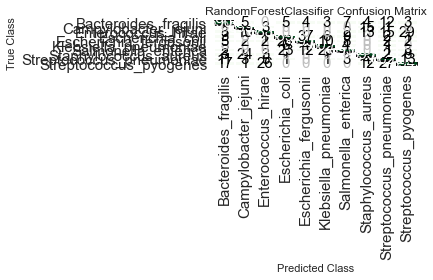

In [27]:
plot_model(rf, plot = 'confusion_matrix')

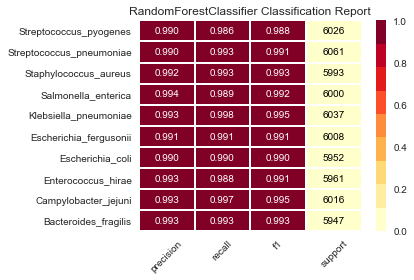

In [28]:
plot_model(rf, plot = 'class_report')

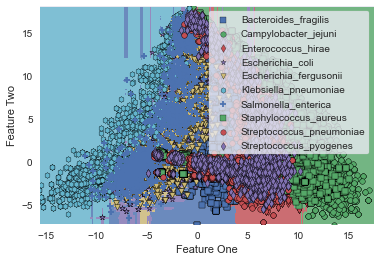

In [29]:
plot_model(rf, plot='boundary')

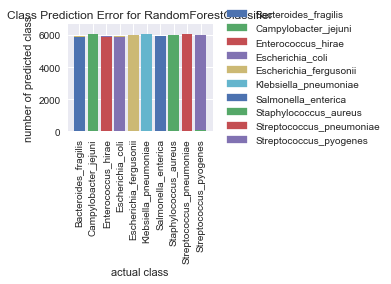

In [30]:
plot_model(rf, plot = 'error')

In [31]:
save_model(et,'untuned_et_14022022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['row_id'],
                                       id_columns=['row_id'],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=No...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_lea

In [32]:
save_model(rf,'untuned_rf_14022022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['row_id'],
                                       id_columns=['row_id'],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=No...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                         

In [33]:
saved_et = load_model('untuned_et_14022022')

Transformation Pipeline and Model Successfully Loaded


In [34]:
saved_et

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['row_id'],
                                      id_columns=['row_id'],
                                      ml_usecase='classification',
                                      numerical_features=[], target='target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=No...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='auto',
                                      max_leaf_nodes=None, max

In [35]:
new_prediction = predict_model(saved_et, data=train)

In [38]:
train.head()

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
0,0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
1,1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica
2,2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,...,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06,Salmonella_enterica
3,3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,...,0.000151,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07,Salmonella_enterica
4,4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae


In [41]:
new_prediction.Score.mean()

0.9888095000000001